In [1]:
# Library dasar
import pandas as pd
import numpy as np

# Preprocessing & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Evaluasi
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

# Load dataset
df = pd.read_csv(list(uploaded.keys())[0])

# Tampilkan 5 data pertama
df.head()

Saving email_spam_indo.csv.zip to email_spam_indo.csv.zip


,Kategori,Pesan
0,spam,Secara alami tak tertahankan identitas perusah...
1,spam,Fanny Gunslinger Perdagangan Saham adalah Merr...
2,spam,Rumah -rumah baru yang luar biasa menjadi muda...
3,spam,4 Permintaan Khusus Pencetakan Warna Informasi...
4,spam,"Jangan punya uang, dapatkan CD perangkat lunak..."


In [4]:
# Informasi dataset
df.info()

# Cek distribusi kelas
df['Kategori'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kategori  2636 non-null   object
 1   Pesan     2636 non-null   object
dtypes: object(2)
memory usage: 41.3+ KB


,count
Kategori,
spam,1368
ham,1268


In [6]:
df = df.dropna()

# Ubah label ke numerik
# spam = 1, non-spam = 0
df['label'] = df['Kategori'].map({'spam': 1, 'ham': 0})

In [8]:
X = df['Pesan']
y = df['label']

# Ambil 1000 data agar sesuai studi kasus
X = X.sample(n=1000, random_state=42)
y = y.loc[X.index]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih :", X_train.shape[0])
print("Jumlah data uji   :", X_test.shape[0])

Jumlah data latih : 800
Jumlah data uji   : 200


In [9]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print("Model Naive Bayes berhasil dilatih")

Model Naive Bayes berhasil dilatih


In [11]:
y_pred = model.predict(X_test_tfidf)

# Tampilkan 10 hasil prediksi
pd.DataFrame({
    'Label Asli': y_test.values[:10],
    'Prediksi Model': y_pred[:10]
})

,Label Asli,Prediksi Model
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


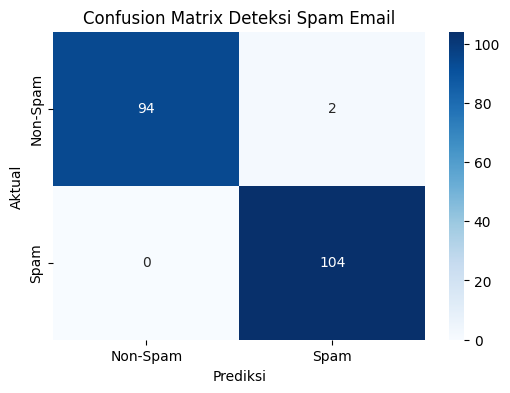

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Deteksi Spam Email')
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Spam', 'Spam']))

Accuracy : 0.99

Classification Report:

              precision    recall  f1-score   support

    Non-Spam       1.00      0.98      0.99        96
        Spam       0.98      1.00      0.99       104

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

